## Fresnel-volume for crosshole tomography

For seismic experiments with finite frequency content, the information in the ray is not only depending on the ray path, but the Fresnel volume around it building a so-called fat ray. Here we illustrate this integration for a crosshole-scenario following the paper of Jordi et al. (2016).

In [38]:
import numpy as np
import pygimli as pg

We first define a regular grid model and a shot and receiver position in different depths of two 10m spaced boreholes.

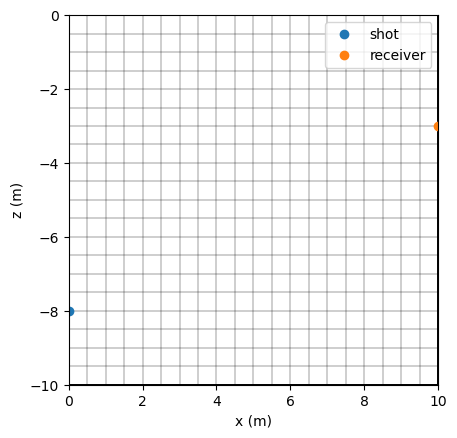

In [39]:
shot = pg.Pos(0, -8)
rec = pg.Pos(10, -3)
dx = 0.5
x = np.arange(shot[0], rec[0]+dx, dx)
y = np.arange(-10, .001, dx)
grid = pg.createGrid(x, y)
ax, _ = pg.show(grid)
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.plot(shot.x(), shot.y(), "o", label="shot")
ax.plot(rec.x(), rec.y(), "o", label="receiver")
ax.legend()

We define a homogeneous velocity of 1000 m/s and compute the traveltime to every model cell by dividing the distance to the shot by the velocity.

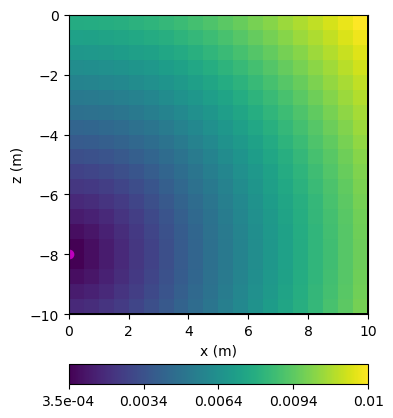

In [40]:
v = 1000 # m/s
ds = np.array([p.distance(shot) for p in grid.cellCenters()])
ts = ds / v
ax, _ = pg.show(grid, ts)
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.plot(shot.x(), shot.y(), "mo", label="shot");

Likewise, we do the same with the receiver as hypothetical shot.

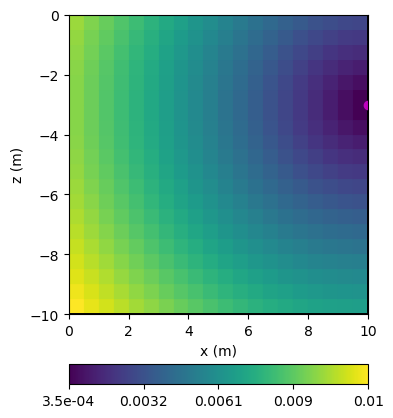

In [41]:
dr = np.array([p.distance(rec) for p in grid.cellCenters()])
tr = dr / v
ax, _ = pg.show(grid, tr)
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.plot(rec.x(), rec.y(), "mo", label="shot");

The first-arrival traveltime is computed by the ratio of the shot-receiver distance and the velocity. If we sum up the travel time from the shot with the one from the receiver and subtract the first-arrival time, we obtain the additional time by taking a detour to the individual model cell.

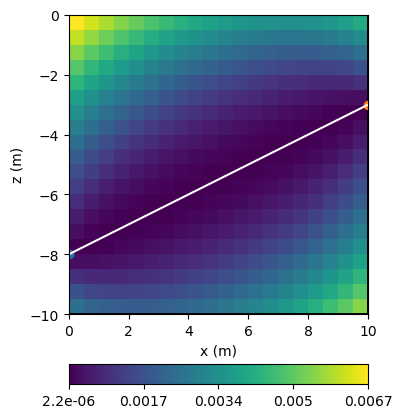

In [42]:
tt = shot.distance(rec) / v
dt = ts + tr - tt
ax, _ = pg.show(grid, dt)
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.plot(shot.x(), shot.y(), "o", label="shot")
ax.plot(rec.x(), rec.y(), "o", label="receiver");
ax.plot([shot.x(), rec.x()], [shot.y(), rec.y()], "w-")

It is zero along the ray and small close to it. If this difference is below the half period of the wave, it is inside of the first Fresnel volume. We compute a weighting function by subtracting 2 f times the delay time from one using a rather low frequency of 200Hz.

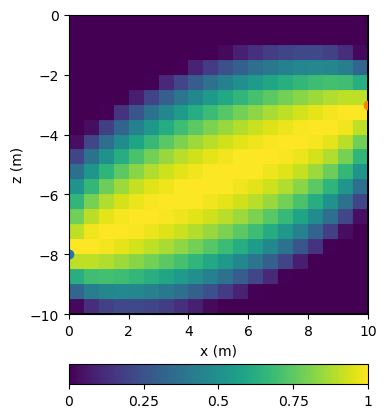

In [43]:
frequency = 200.
weight = 1 - 2 * frequency * dt
weight[weight < 0] = 0
ax, _ = pg.show(grid, weight)
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.plot(shot.x(), shot.y(), "o", label="shot")
ax.plot(rec.x(), rec.y(), "o", label="receiver");

A large part of the model is part of the first fresnel volume as the wavelength is 5m.
We repeat the same with a higher frequency of 1000 Hz leading to a wavelength of 1m and a correpondingly thinner Fresnel volume.

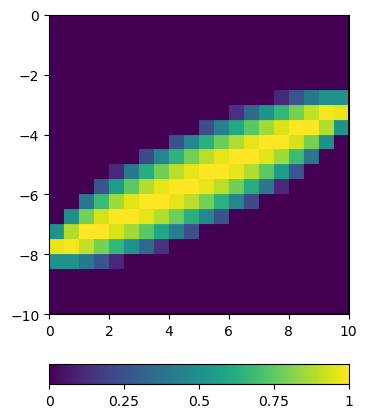

In [45]:
frequency = 1000.
weight = 1 - 2 * frequency * dt
weight[weight < 0] = 0
pg.show(grid, weight)
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.plot(shot.x(), shot.y(), "o", label="shot")
ax.plot(rec.x(), rec.y(), "o", label="receiver");

This weighting function defining the "fat ray" is used for computing the Jacobian matrix of the traveltime manager if the `fatray` option is used. Note that it does not affect the first-arrival traveltime but might lead the inversion in favourable directions.

### References
Jordi, C., C. Schmelzbach, and S. Greenhalgh (2016): “Frequency-dependent traveltime tomography using fat rays: application to near-surface seismic imaging,” Journal of Applied Geophysics, 131, 202–213, doi:10.1016/j.jappgeo.2016.06.002